In [1]:
import numpy as np
import os
from data import ImageDataset
import matplotlib.pyplot as plt

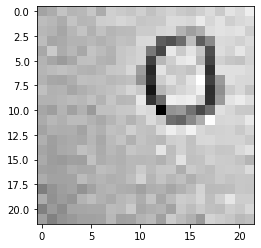

In [3]:
train_path = "../data/MYON/train/"
train_dataset = ImageDataset(train_path)

plt.imshow(train_dataset[0][0], cmap="gray")

In [4]:
def filter_img(img, kernel):
    k, l = kernel.shape
    img_filtered = np.zeros(img.shape)
    img_padded = np.zeros((img.shape[0]+2, img.shape[1]+2))
    img_padded[1:-1,1:-1] = img
    for i in range(img.shape[0]-k+1):
        for j in range(img.shape[1]-l+1):
            img_filtered[i+1,j+1] = np.tensordot(img_padded[i+1:i+1+k, j+1:j+1+l], kernel)
    return img_filtered

def gauss(img):
    g = 1/16* np.outer([1,2,1], [1,2,1])
    return filter_img(img, g)
        

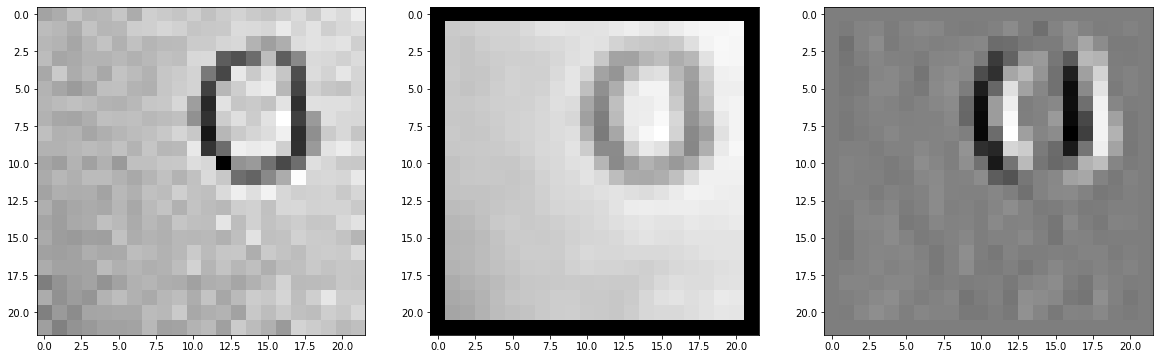

In [9]:
plt.figure(figsize=(20,10))
plt.subplot(1,3,1)
plt.imshow(train_dataset[0][0], cmap="gray")
plt.subplot(1,3,2)
plt.imshow(gauss(train_dataset[0][0]), cmap="gray")
plt.subplot(1,3,3)
k = np.outer([1, 2, 1], [-1, 0, 1])
plt.imshow(filter_img(train_dataset[0][0], k), cmap="gray")

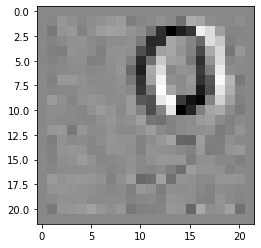

In [13]:
k1 = np.outer([1, 2, 1], [-1, 0, 1])
k2 = np.outer([-1, 0, 1], [1, 2, 1])
i1 = filter_img(train_dataset[0][0], k1)
i2 = filter_img(train_dataset[0][0], k2)
plt.imshow(np.sqrt(i1**2+i2**2), cmap="gray")
plt.imshow(np.sqrt(i1**2+i2**2)*np.arctan2(i1, i2), cmap="gray")